<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout6_Predictions_CIs_PIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #6 : SLR: Predictions, Confidence Intervals, and Prediction Intervals


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Find Cars Dataset

Consider the following data collected from the FindCars.com website.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>CarType, e.g. car, pickup, suv, etc.</li>
          <li>Miles</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=14154g-4S0k9eGsqD8xlEmGahpyX79dH2" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Reading in the data


The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [51]:
#@title Load Tidyverse Package
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset. 

In [52]:
#@title Read in Data

# Reading data in using read.csv via Base 
FindCars <- read_csv("http://www.StatsClass.org/stat360/Datasets/FindCars.csv")

Rows: 8037 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Description, Make, Call For Price, CarType, ForeignBased, Engine, ...
dbl  (3): Year, Price, Miles


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



The **head()** function can be used to see the first few lines of the dataset.

In [53]:
#@title View the first few rows of data
head(FindCars)

Description,Year,Make,Price,Call For Price,Miles,CarType,ForeignBased,Engine,DriveTrain,ExactColor,Color,Dealer,Location,Sold
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2010 Acura TL SH-AWD W/TECH W/HPT,2010,Acura,9995,No,151126,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,Black,Black,Eagle Motors WI,"Onalaska, WI",No
2019 Acura TLX SH-AWD,2019,Acura,35579,No,37506,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,White,White,Tom Kadlec Honda,"Rochester, MN",No
2019 Acura TLX A-Spec,2019,Acura,NA,Yes,9707,Car,Yes,3.5L V6 SOHC 24V,Auto FWD,White,White,Shakopee Chevrolet,"Shakopee, MN",No
2010 Acura TSX,2010,Acura,6500,No,165000,Car,Yes,2.4L L4 DOHC 16V,Auto FWD,Gray,Gray,Midway Auto Sales,"Rochester, MN",No
2020 Audi A3 S line Premium 45 TF,2020,Audi,38940,No,0,Car,Yes,2.0L L4 DOHC 16V,Auto 4WD/AWD,Mythos Blk Met,NA,Park Place Motor Cars,"Rochester, MN",No
2021 Audi A4 Premium,2021,Audi,43805,No,0,Car,Yes,4 2.0 L,Auto,Glacier White Metallic,White,Park Place Motor Cars,"Rochester, MN",No


## SLR Analysis for Cars with 25000 < Miles < 100000

First, get a data.frame that contains the appropriate vehicles.


*   CarType = Car
*   25000 < Miles < 100000



In [54]:
#@title Obtain CarOnly data
CarsOnly <- (FindCars
               %>% filter(CarType == "Car" & Miles > 25000 & Miles < 100000)
            )

Take a look at first few rows of CarsOnly data.frame.

In [56]:
head(CarsOnly)

Description,Year,Make,Price,Call For Price,Miles,CarType,ForeignBased,Engine,DriveTrain,ExactColor,Color,Dealer,Location,Sold
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019 Acura TLX SH-AWD,2019,Acura,35579,No,37506,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,White,White,Tom Kadlec Honda,"Rochester, MN",No
2018 Audi A4 Premium Plus,2018,Audi,30498,No,31949,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Matador Red Metallic,Red,Park Place Motor Cars,"Rochester, MN",No
2017 Audi A4 2.0T Premium quattro,2017,Audi,22987,No,75410,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Silver,Silver,Mercedes Benz of Roc..,"Rochester, MN",No
2017 Audi A4 Premium Plus quattro,2017,Audi,26998,No,89973,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Mythos Black Metallic,Black,Park Place Motor Cars,"Rochester, MN",No
2012 Audi A4 2.0T quattro Premium,2012,Audi,10999,No,89848,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Red,Red,Gilly's Auto Sales,"Rochester, MN",Yes
2006 Audi A4 2.0T quattro,2006,Audi,3999,No,69820,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Silver,Silver,Gilly's Auto Sales,"Rochester, MN",Yes


Use the dim() function to determine the size of the CarsOnly data.frame.  This dataset contains a total of 568 vehicles some of which may have missing values for Price and/or Miles.

In [57]:
dim(CarsOnly)

[1] 568  15

### Simple Linear Regression - Model Setup

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Miles</li>
  <li><i>Assume</i> the following structure for the <strong>mean</strong> and <strong>variance</strong> functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Miles) = \beta_{0} + \beta_{1} * Miles$</li>
  <li>$Var(Price | Miles) = \sigma^{2}$</li>
</ul></ul>

### Simple Linear Regression - Scatterplot

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


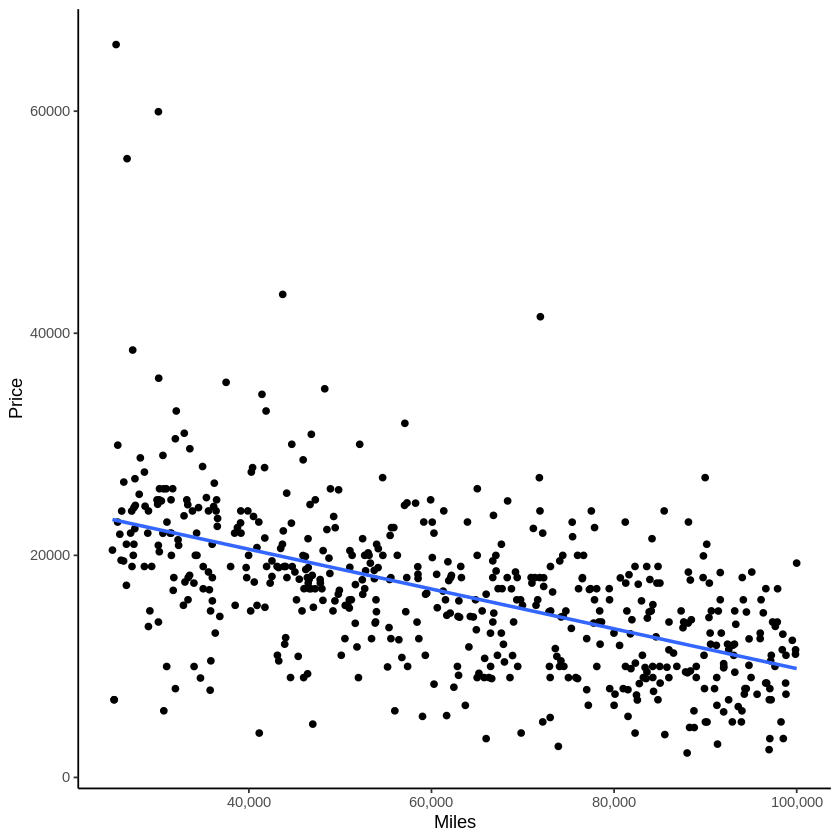

In [207]:
#@title Scatterplot with simple linear regression line
ggplot(data=CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +    #adding the points to the plot
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +  #adding a regression line to the plot without the standard error bands 
  scale_x_continuous(labels = scales::comma) +
  theme_classic()

Use a loess smoother to make sure a linear mean function seems reasonable.

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


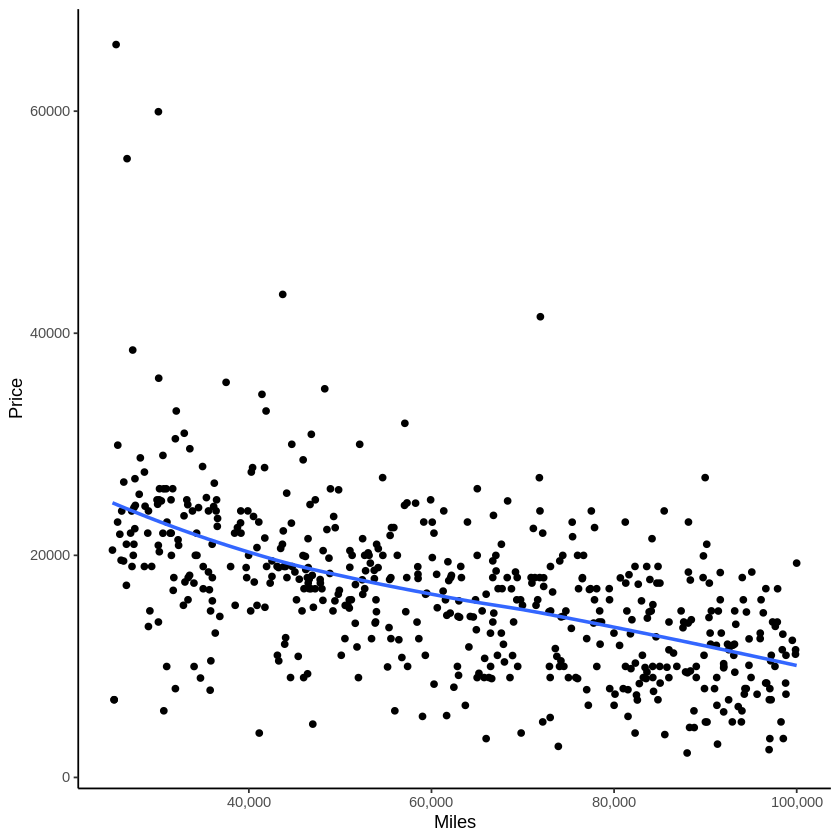

In [208]:
#@title Checking the appropriateness of the simple linear regression model
ggplot(data=CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +    #adding the points to the plot
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to the plot without the standard error bands 
  scale_x_continuous(labels = scales::comma) +
  theme_classic()

Why not check the constant variance assumption as well.

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


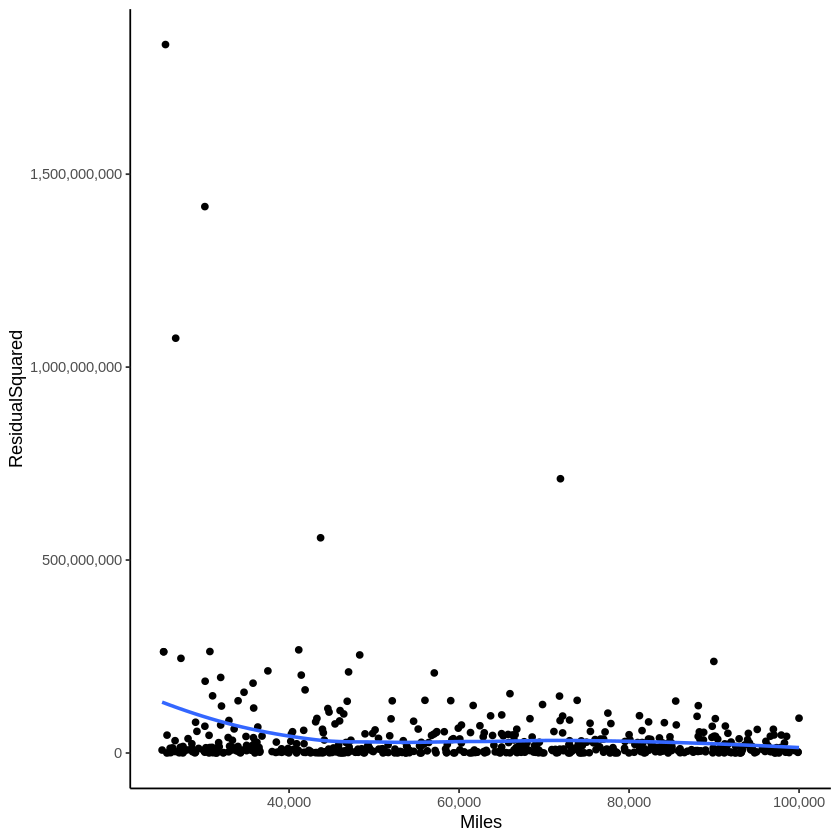

In [209]:
#@title Checking whether or not the variance appears to be constant
#Get a reduced data.frame for convenience
CarsOnly_Reduced <- ( CarsOnly  
                        %>% select(Price, Miles)
                    )
#Fit the simple linear regression model
CarPrice_lm <- lm(Price ~ Miles, data = CarsOnly_Reduced)

#Add the predicted values to the dataframe
CarsOnly_Reduced_withPredictions <- (CarsOnly_Reduced 
                                        %>% mutate(SLR_Predicted = predict(CarPrice_lm, newdata=CarsOnly_Reduced) )
                                      )
#View the first few rows of updated data.frame
#head(CarsOnly_Reduced_withPredictions)


#Appending residuals and their squared values to ImpactCrater the data.frame
CarsOnly_Reduced_withPredictions_withResiduals <- (CarsOnly_Reduced_withPredictions
                    %>% mutate(Residual = Price - SLR_Predicted)
                    %>% mutate(ResidualSquared = Residual^2)
                    #%>% filter(ResidualSquared < 1000000000)
               )
#View the first few rows of updated data.frame
#head(CarsOnly_Reduced_withPredictions_withResiduals)


#Create plot with Conditional Mean Function via Loess
ggplot(data=CarsOnly_Reduced_withPredictions_withResiduals, aes(x=Miles,y=ResidualSquared)) + 
  geom_point() + 
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) + 
  scale_x_continuous(labels = scales::comma) +
  scale_y_continuous(labels = scales::comma) +
  theme_classic()

### Simple Linear Regression - Fitting the Model

Fitting the simple linear regression model.

In [70]:
#@title Fitting the simple linear regression model
Car_Model <- lm(Price ~ Miles, data=CarsOnly)

Getting a summary of the linear model object.

In [113]:
#@title Summary of the SLR output
summary(Car_Model)


Call:
lm(formula = Price ~ Miles, data = CarsOnly)

Residuals:
   Min     1Q Median     3Q    Max 
-16348  -3592   -235   2950  42847 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.771e+04  7.996e+02   34.66   <2e-16 ***
Miles       -1.791e-01  1.216e-02  -14.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6247 on 540 degrees of freedom
  (26 observations deleted due to missingness)
Multiple R-squared:  0.2866,	Adjusted R-squared:  0.2853 
F-statistic:   217 on 1 and 540 DF,  p-value: < 2.2e-16


The anova() function can be used to obtain additional summaries of the simple linear regression output.

In [98]:
#@title ANOVA output 
anova(Car_Model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Miles,1,8468379923,8468379923,216.9794,1.579485e-41
Residuals,540,21075384638,39028490,NA,NA


Getting the 95% confidence intervals for the model parameters, i.e. $\beta_1$ and $\beta_0$.

In [210]:
confint(Car_Model)

,2.5 %,97.5 %
(Intercept),26140.8748739,29282.2651657
Miles,-0.2030094,-0.1552352


### Simple Linear Regression - Making a Prediction

Suppose the goal is to make a prediction for the price of a vehicle with Miles = 60000.

In [211]:
#Construct a data.frame that includes that value for prediction
MyCar <- data.frame(Miles=c(60000))

#Use the predict() function to  make prediction
predict(Car_Model, newdata = MyCar)


1 
16964.23

### Simple Linear Regression - Confidence Interval and Prediction Intervals

Getting a 95% confidence interval for the <u>average</u> predicted value.

In [214]:
#Specify interval="confid" to obtain a 95% Confidence Interval
predict(Car_Model, newdata = MyCar, interval = "confid", se = TRUE)

,fit,lwr,upr
1,16964.23,16435.07,17493.39


Getting a 95% prediction interval for an <u>individual</u> predicted value.

In [213]:
#Specify interval="predict" to obtain a 95% Prediction Interval
predict(Car_Model, newdata = MyCar, interval = "predict", se = TRUE)

,fit,lwr,upr
1,16964.23,4680.882,29247.58


### Simple Linear Regression -- Plotting CI and PI Bands

The geom_smooth() function within ggplot allows the one to include the 95% confidence interval bands for the <u>average</u> predicted values.

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


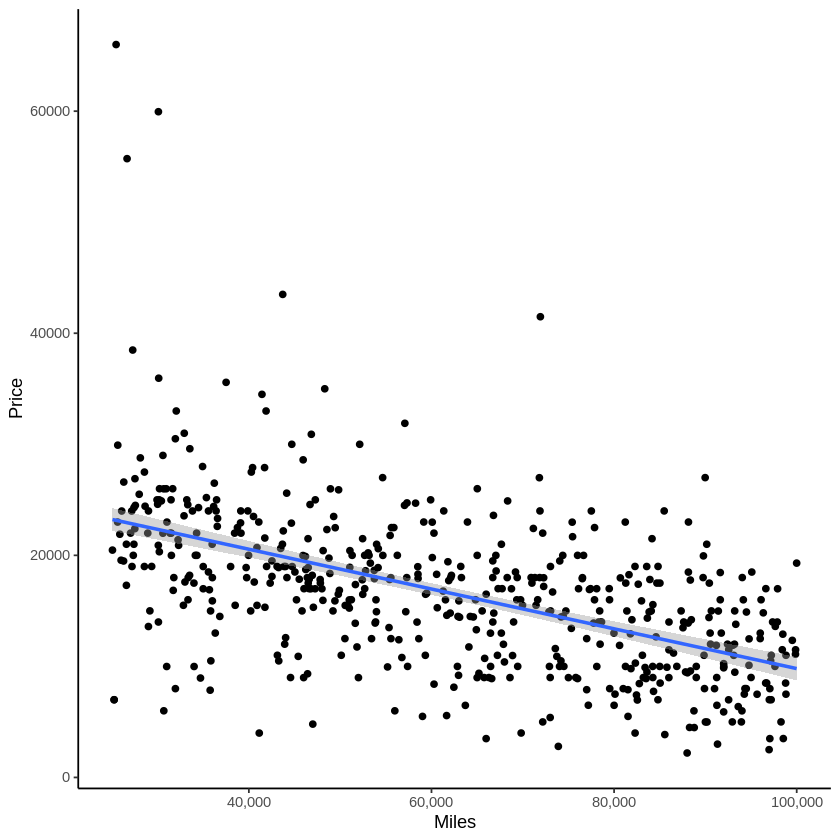

In [216]:
#Specifying se=TRUE in geom_smooth will add 95% confidence interval bands
ggplot(data=CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +    
  geom_smooth(method='lm', formula = y ~ x, se=TRUE) +  
  scale_x_continuous(labels = scales::comma) +
  theme_classic()

The following code will plot the predicted values, the 95% confidence intervals, and the 95% prediction intervals.

Warning message:
“Removed 26 rows containing missing values (geom_point).”


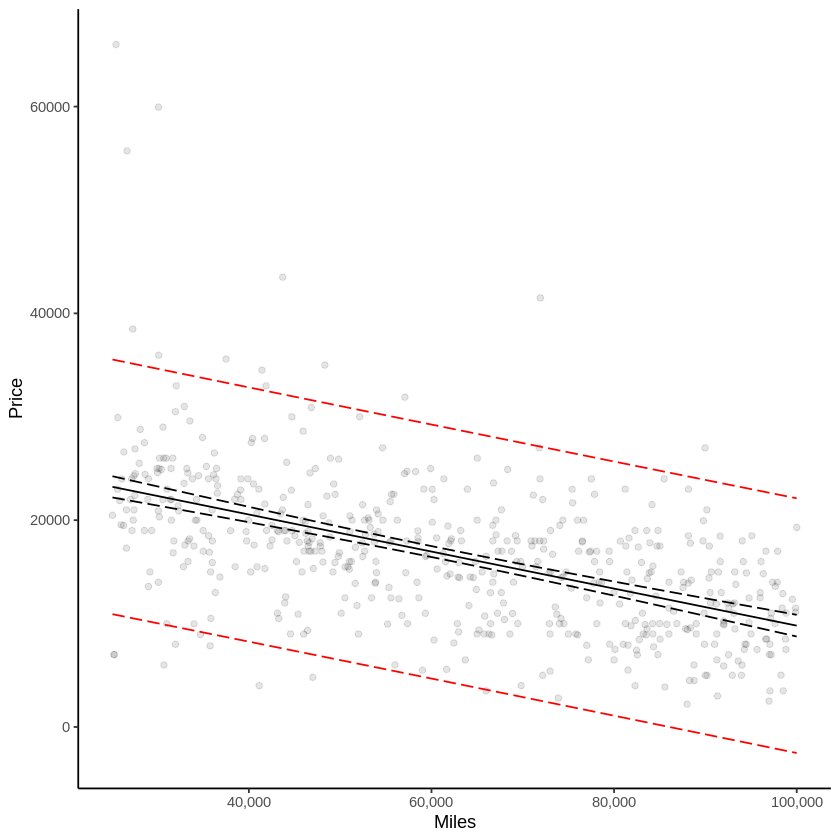

In [217]:
#@title Creating a plot containing both CIs and PIs
#Fit the simple linear regression model
CarPrice_lm <- lm(Price ~ Miles, data = CarsOnly)

#Add the predicted/CIs/PIs to the dataframe
CarsOnly_afterPredict <- (CarsOnly 
                                        %>% mutate(PredictInfo_CI = predict(CarPrice_lm, newdata=CarsOnly_Reduced, interval = "confid"))
                                        %>% mutate(PredictInfo_PI = predict(CarPrice_lm, newdata=CarsOnly_Reduced, interval = "predict"))
                                        %>% rowwise()
                                        %>% mutate(
                                                 Predicted = PredictInfo_CI[1],
                                                 LowerCILimit = PredictInfo_CI[2], 
                                                 UpperCILimit = PredictInfo_CI[3],
                                                 LowerPILimit = PredictInfo_PI[2], 
                                                 UpperPILimit = PredictInfo_PI[3]
                                                )
                                 )

#Next, use geom_line to plot the predictions/CIs/PIs
ggplot(data=CarsOnly_afterPredict, aes(x=Miles,y=Price)) + 
  geom_point(alpha = 0.10) +    
  geom_line(aes(Miles, Predicted), color='black') +
  geom_line(aes(Miles, LowerCILimit), color='black', linetype="longdash") +
  geom_line(aes(Miles, UpperCILimit), color='black', linetype="longdash") +
  geom_line(aes(Miles, LowerPILimit), color='red', linetype="longdash") +
  geom_line(aes(Miles, UpperPILimit), col='red', linetype="longdash") + 
  scale_x_continuous(labels = scales::comma) +
  theme_classic()


The following code identifies vehicles that have an actual Price less than the lower 95% prediction interval limit. 

In [219]:
#Getting the outliers on the lower end
(CarsOnly_afterPredict
  %>% filter(Price < LowerPILimit)
  %>% mutate(Outlier = "Yes, much lower than expected")
  %>% select(Description, Year, Make, Price, Miles, Sold, Predicted, Outlier, Dealer, Location)
)

Description,Year,Make,Price,Miles,Sold,Predicted,Outlier,Dealer,Location
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
2005 Buick Century CUSTOM,2005,Buick,6995,25243,Yes,23189.99,"Yes, much lower than expected",Countryside Auto,"Austin, MN"
2005 Buick Century CUSTOM,2005,Buick,6995,25243,Yes,23189.99,"Yes, much lower than expected",Countryside Auto,"Austin, MN"
2000 Chevrolet Malibu Base,2000,Chevrolet,3495,65986,No,15892.01,"Yes, much lower than expected",C & C Auto Sales,"Charles City, IA"
2017 Chevrolet Spark LS,2017,Chevrolet,8950,34700,No,21496.03,"Yes, much lower than expected",By Owner,"Hayfield, MN"
2006 Ford Crown Victoria ls,2006,Ford,4800,47000,No,19292.82,"Yes, much lower than expected",Lakeside Auto,"Alden, MN"
1992 Ford Crown Victoria LX,1992,Ford,7855,35760,No,21306.16,"Yes, much lower than expected",St. Croix Classics,"Lakeland, MN"
2007 Pontiac G6 BASE,2007,Pontiac,7995,31953,No,21988.07,"Yes, much lower than expected",Countryside Auto,"Austin, MN"
2004 Suzuki Forenza LX,2004,Suzuki,3995,41137,Yes,20343.02,"Yes, much lower than expected",Kuehn Motors - Austin,"Austin, MN"
2013 Volkswagen Jetta S,2013,Volkswagen,6000,30683,No,22215.56,"Yes, much lower than expected","Mankato Ford, LLC","Mankato, MN"


End of Document